In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# Convert the training and test labels to one-hot vectors
train_y_cat = to_categorical(train_y, num_classes=10)
test_y_cat = to_categorical(test_y, num_classes=10)

# Preprocess the data for Convolutional layers
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# Split train data for train and validation data!
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_y_cat, test_size=0.2, random_state=13)

print('training set shape:', train_X.shape)
print('validation set shape:', valid_X.shape)
print('training label set shape:', train_label.shape)
print('validation label set shape:', valid_label.shape)

2024-06-11 16:15:43.568429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 16:16:48.039991: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-11 16:16:48.040234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-06-11 16:16:48.040251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

training set shape: (48000, 28, 28, 1)
validation set shape: (12000, 28, 28, 1)
training label set shape: (48000, 10)
validation label set shape: (12000, 10)


## Convolutional model nr.4.

This model uses convolutional layers to extract features from the images, max pooling to reduce the spatial dimensions, and batch normalization to normalize the inputs within each batch. The Dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

- `Sequential` class: creates a network, allows stacking layers sequentially
- `Conv2D` class: extracts patterns from greyscale images
- `Flatten` class: prepare output of convolutional layers for the fully connected layers
- `Dense` class: creates fully connected layers
- `SGD` class: specifies the stochastic gradient descent optimizer
- `Dropout` class: dropout regularization, which helps prevent overfitting by randomly setting a fraction of the input units to 0 during training
- `BatchNormalization`: stabilizes training, reduces overfitting, and speeds up convergence
- `MaxPooling2D`: enhances translation invariance and reduces dimensionality, contributing to better precision even when pixel patterns are similar

### Layer structure:
- Input layer: takes input with shape (28, 28, 1)
- 1st hidden layer: 32 nodes, 'relu' activation function and input shape of (28, 28, 1)
- 2nd hidden layer: 64 nodes, 'relu' activation function
- Dense layers: first one has 256 neurons, the second one has 128 neurons, both uses 'relu' activation function
- Dropout layer: sets a fraction (0.5) of input units to 0 at each update
- Output layer: 10 nodes (for the 10 classes) and 'softmax' activation function

### Compile the model
- with the use of the `compile()` function, the model is configured for training and sets the SGD optimizer, loss function, and metrics
- `learning_rate = 0.001`
- `loss='categorical_crossentropy'`

### Train the model
- fit the model to the training data for a fixed number of iterations
- `epochs=10`
- `batch_size=1000`

### Model evaluation
- compute the loss and the accuracy when compiling the model for the training and test data

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.optimizers import SGD
from keras.layers import MaxPooling2D, BatchNormalization

# Initialize the model
model_cnn4 = Sequential()

# Add convolutional layers
model_cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn4.add(BatchNormalization())
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn4.add(BatchNormalization())
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model_cnn4.add(Flatten())

# Add dense layers with dropout for regularization
model_cnn4.add(Dense(256, activation='relu'))
model_cnn4.add(Dropout(0.5))
model_cnn4.add(Dense(128, activation='relu'))
model_cnn4.add(Dropout(0.5))

# Output layer with softmax activation for classification
model_cnn4.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn4.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn4 = model_cnn4.fit(train_X, train_label, epochs=10, batch_size=1000, validation_data=(valid_X, valid_label))

# Evaluate the model on the training data
train_loss_relu, train_accuracy_relu = model_cnn4.evaluate(train_X, train_label, verbose=0)

# Print the training loss and accuracy
print(f"Train Loss: {train_loss_relu:.4f}, Train Accuracy: {train_accuracy_relu:.4f}")

# Evaluate the model on the test data
test_loss_relu, test_accuracy_relu = model_cnn4.evaluate(test_X, test_y_cat, verbose=0)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss_relu:.4f}, Test Accuracy: {test_accuracy_relu:.4f}")

2024-06-11 16:21:57.078915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-11 16:21:57.079012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (evecomp): /proc/driver/nvidia/version does not exist
2024-06-11 16:21:57.105961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
48/48 [==============================] - 21s 261ms/step - loss: 1.9799 - accuracy: 0.4098 - val_loss: 0.8832 - val_accuracy: 0.7218
Epoch 2/10
48/48 [==============================] - 12s 249ms/step - loss: 1.1582 - accuracy: 0.6081 - val_loss: 0.7320 - val_accuracy: 0.7623
Epoch 3/10
48/48 [==============================] - 12s 248ms/step - loss: 0.9857 - accuracy: 0.6639 - val_loss: 0.6508 - val_accuracy: 0.7775
Epoch 4/10
48/48 [==============================] - 12s 253ms/step - loss: 0.8776 - accuracy: 0.6959 - val_loss: 0.5974 - val_accuracy: 0.7933
Epoch 5/10
48/48 [==============================] - 12s 248ms/step - loss: 0.8276 - accuracy: 0.7150 - val_loss: 0.5654 - val_accuracy: 0.8012
Epoch 6/10
48/48 [==============================] - 12s 250ms/step - loss: 0.7768 - accuracy: 0.7309 - val_l

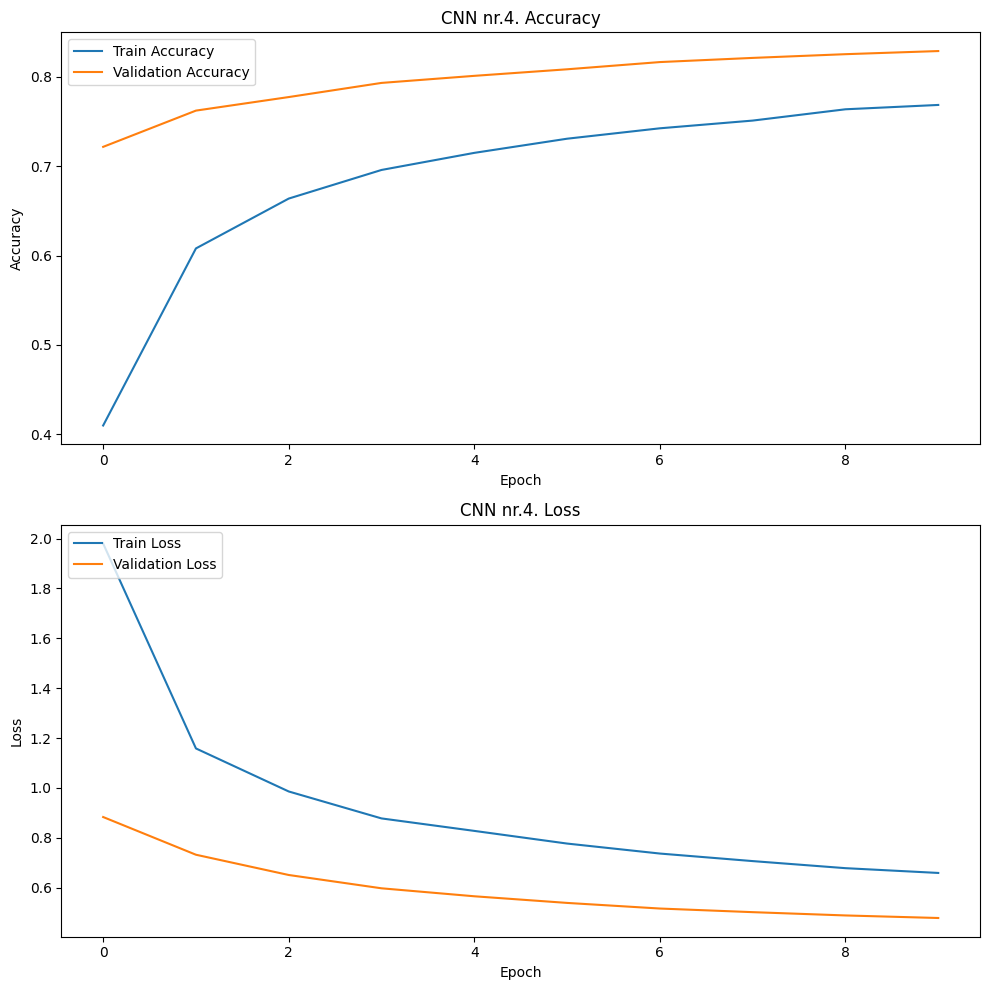

In [3]:
# Plot learning curves
from matplotlib import pyplot

fig, ax = pyplot.subplots(2, 1, figsize=(10, 10))

# Plot training & validation accuracy values
ax[0].plot(history_cnn4.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_cnn4.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('CNN nr.4. Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Plot training & validation loss values
ax[1].plot(history_cnn4.history['loss'], label='Train Loss')
ax[1].plot(history_cnn4.history['val_loss'], label='Validation Loss')
ax[1].set_title('CNN nr.4. Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

pyplot.tight_layout()
pyplot.show()

In [5]:
!pip install seaborn

313/313 [==============================] - 1s 4ms/step


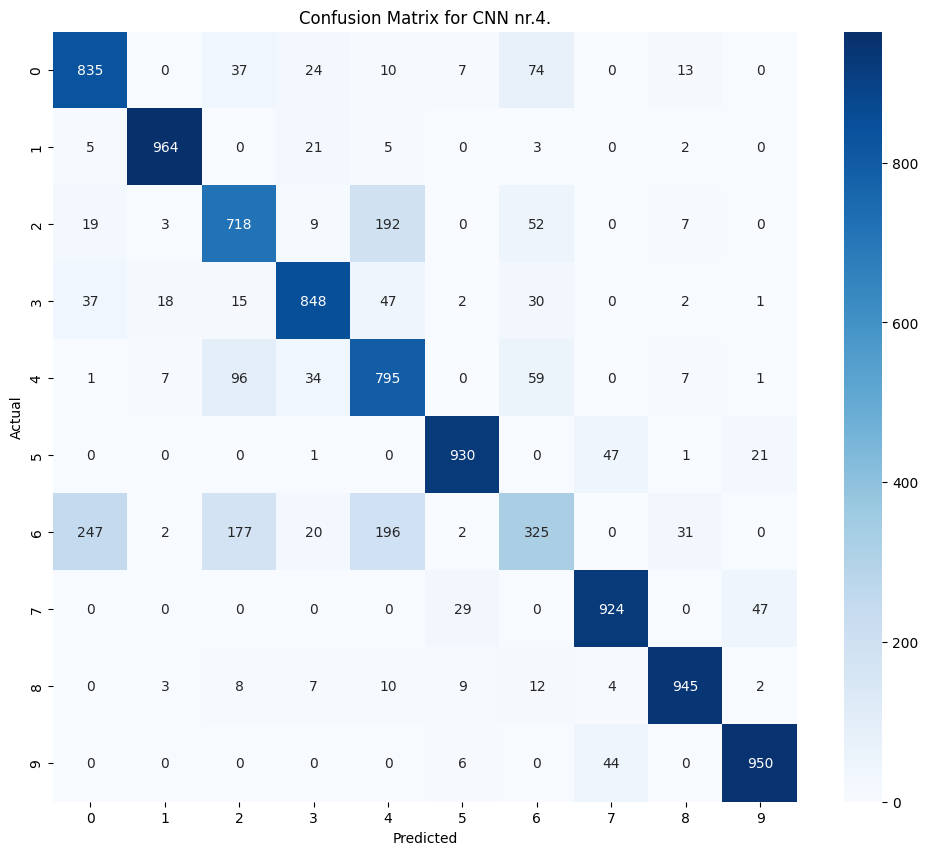

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict the values from the validation dataset
Y_pred = model_cnn4.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y_cat, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
pyplot.ylabel('Actual')
pyplot.xlabel('Predicted')
pyplot.title('Confusion Matrix for CNN nr.4.')
pyplot.show()

## Convolutional model nr.5.

This model uses convolutional layers to extract features from the images, max pooling to reduce the spatial dimensions, and batch normalization to normalize the inputs within each batch. The Dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
The model is compiled with the **ADAM** optimizer, which is an adaptive learning rate optimizer.

- `Sequential` class: creates a network, allows stacking layers sequentially
- `Conv2D` class: extracts patterns from greyscale images
- `Flatten` class: prepare output of convolutional layers for the fully connected layers
- `Dense` class: creates fully connected layers
- `SGD` class: specifies the stochastic gradient descent optimizer
- `Dropout` class: dropout regularization, which helps prevent overfitting by randomly setting a fraction of the input units to 0 during training
- `BatchNormalization`: stabilizes training, reduces overfitting, and speeds up convergence
- `MaxPooling2D`: enhances translation invariance and reduces dimensionality, contributing to better precision even when pixel patterns are similar

### Layer structure:
- Input layer: takes input with shape (28, 28, 1)
- 1st hidden layer: 32 nodes, 'relu' activation function and input shape of (28, 28, 1)
- 2nd hidden layer: 64 nodes, 'relu' activation function
- Dense layers: first one has 256 neurons, the second one has 128 neurons, both uses 'relu' activation function
- Dropout layer: sets a fraction (0.5) of input units to 0 at each update
- Output layer: 10 nodes (for the 10 classes) and 'softmax' activation function

### Compile the model
- with the use of the `compile()` function, the model is configured for training and sets the ADAM optimizer, loss function, and metrics
- `learning_rate = 0.001`
- `loss='categorical_crossentropy'`

### Train the model
- fit the model to the training data for a fixed number of iterations
- `epochs=10`
- `batch_size=1000`

### Model evaluation
- compute the loss and the accuracy when compiling the model for the training and test data

In [5]:
# Initialize the model
model_cnn5 = Sequential()

# Add convolutional layers
model_cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn5.add(BatchNormalization())
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn5.add(BatchNormalization())
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model_cnn5.add(Flatten())

# Add dense layers with dropout for regularization
model_cnn5.add(Dense(256, activation='relu'))
model_cnn5.add(Dropout(0.5))
model_cnn5.add(Dense(128, activation='relu'))
model_cnn5.add(Dropout(0.5))

# Output layer with softmax activation for classification
model_cnn5.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn5 = model_cnn5.fit(train_X, train_label, epochs=10, batch_size=1000, validation_data=(valid_X, valid_label))

# Evaluate the model on the training data
train_loss_relu, train_accuracy_relu = model_cnn5.evaluate(train_X, train_label, verbose=0)

# Print the training loss and accuracy
print(f"ReLU Train Loss: {train_loss_relu:.4f}, Train Accuracy: {train_accuracy_relu:.4f}")

# Evaluate the model on the test data
test_loss_relu, test_accuracy_relu = model_cnn5.evaluate(test_X, test_y_cat, verbose=0)

# Print the test loss and accuracy
print(f"ReLU Test Loss: {test_loss_relu:.4f}, Test Accuracy: {test_accuracy_relu:.4f}")

Epoch 1/10
48/48 [==============================] - 14s 259ms/step - loss: 1.0255 - accuracy: 0.6709 - val_loss: 0.7063 - val_accuracy: 0.7649
Epoch 2/10
48/48 [==============================] - 12s 254ms/step - loss: 0.5419 - accuracy: 0.8071 - val_loss: 0.4974 - val_accuracy: 0.8492
Epoch 3/10
48/48 [==============================] - 12s 254ms/step - loss: 0.4363 - accuracy: 0.8458 - val_loss: 0.3733 - val_accuracy: 0.8686
Epoch 4/10
48/48 [==============================] - 12s 256ms/step - loss: 0.3868 - accuracy: 0.8631 - val_loss: 0.3292 - val_accuracy: 0.8835
Epoch 5/10
48/48 [==============================] - 12s 258ms/step - loss: 0.3494 - accuracy: 0.8751 - val_loss: 0.3093 - val_accuracy: 0.8931
Epoch 6/10
48/48 [==============================] - 12s 252ms/step - loss: 0.3274 - accuracy: 0.8839 - val_l

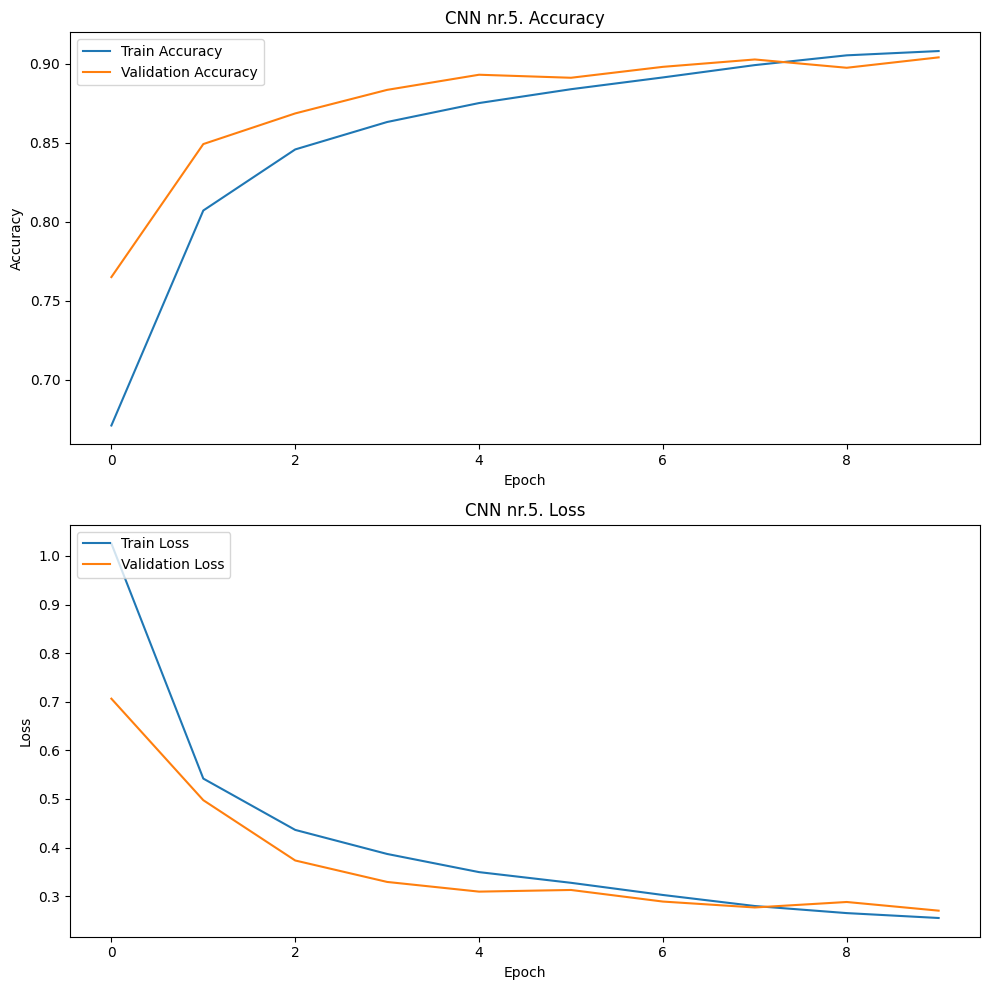

In [6]:
# Plot learning curves
from matplotlib import pyplot

fig, ax = pyplot.subplots(2, 1, figsize=(10, 10))

# Plot training & validation accuracy values
ax[0].plot(history_cnn5.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_cnn5.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('CNN nr.5. Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Plot training & validation loss values
ax[1].plot(history_cnn5.history['loss'], label='Train Loss')
ax[1].plot(history_cnn5.history['val_loss'], label='Validation Loss')
ax[1].set_title('CNN nr.5. Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

pyplot.tight_layout()
pyplot.show()

313/313 [==============================] - 1s 4ms/step


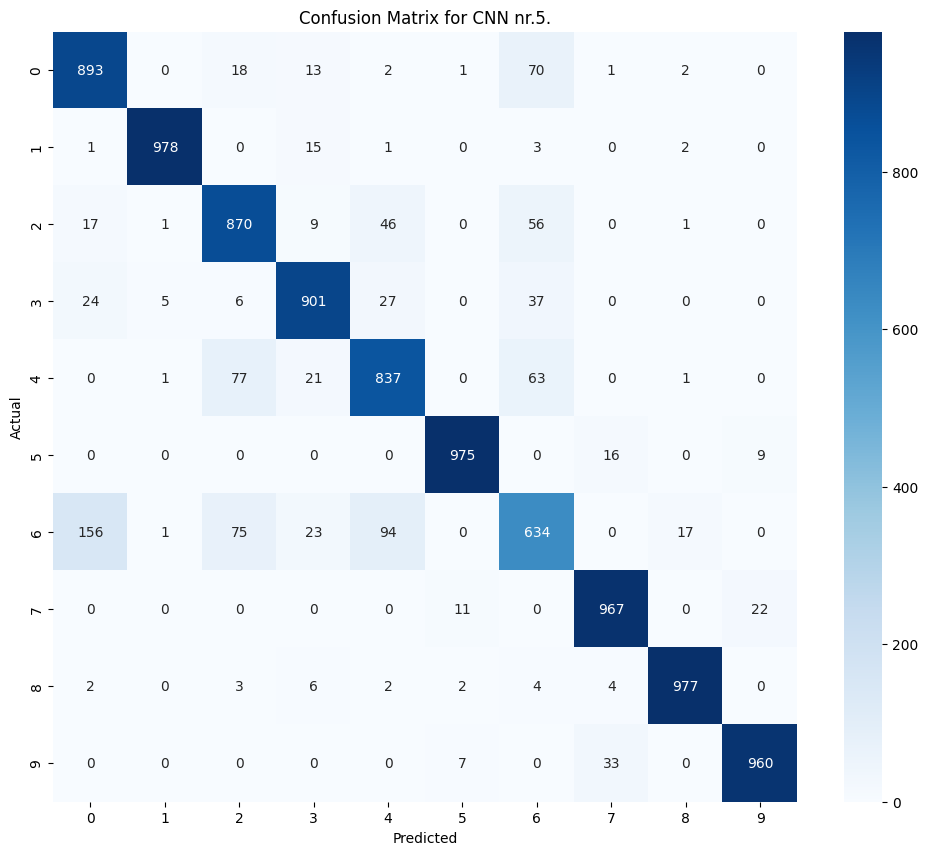

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict the values from the validation dataset
Y_pred = model_cnn5.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y_cat, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
pyplot.ylabel('Actual')
pyplot.xlabel('Predicted')
pyplot.title('Confusion Matrix for CNN nr.5.')
pyplot.show()